In [1]:
''' CNN MNIST digits classification

3-layer CNN for MNIST digits classification 
First 2 layers - Conv2D-ReLU-MaxPool
3rd layer - Conv2D-ReLU-Dropout
4th layer - Dense(10)
Output Activation - softmax
Optimizer - Adam

99.4% test accuracy in 10epochs

https://github.com/PacktPublishing/Advanced-Deep-Learning-with-Keras
'''

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist

Using TensorFlow backend.
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# compute the number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# input image dimensions
image_size = x_train.shape[1]
# resize and normalize
x_train = np.reshape(x_train,[-1, image_size, image_size, 1])
x_test = np.reshape(x_test,[-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [3]:
# network parameters
# image is processed as is (square grayscale)
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 64
dropout = 0.2

# model is a stack of CNN-ReLU-MaxPooling
model = Sequential()
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(Flatten())
# dropout added as regularizer
model.add(Dropout(dropout))
# output layer is 10-dim one-hot vector
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 576)               0         
__________

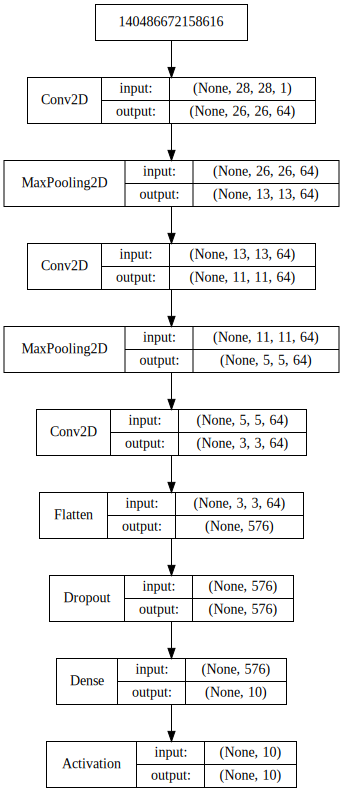

In [4]:
from IPython.display import SVG

from keras.utils.vis_utils import model_to_dot



def plot_keras_model(model,

                     show_shapes=True,

                     show_layer_names=True):

    return SVG(model_to_dot(model,

                            show_shapes=show_shapes,

                            show_layer_names=show_layer_names).create(prog='dot',format='svg'))



plot_keras_model(model, show_shapes=True, show_layer_names=False)

In [ ]:
# plot_model(model, to_file='cnn-mnist.png', show_shapes=True)

In [5]:
# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# train the network
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

Epoch 1/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.2709 - acc: 0.9187
Epoch 2/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.0668 - acc: 0.9787
Epoch 3/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.0477 - acc: 0.9850
Epoch 4/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.0382 - acc: 0.9883
Epoch 5/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.0325 - acc: 0.9900
Epoch 6/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.0272 - acc: 0.9911
Epoch 7/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.0239 - acc: 0.9921
Epoch 8/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.0209 - acc: 0.9932
Epoch 9/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.0182 - acc: 0.9939
Epoch 10/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.0173 - acc: 0.9941

In [6]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

10000/10000 [==============================] - 0s 32us/step

Test accuracy: 99.3%
